Dimensionless stellar radius: 6.9090
Dimensionless stellar mass: 2.0170
Central density to average density ratio: 54.5030


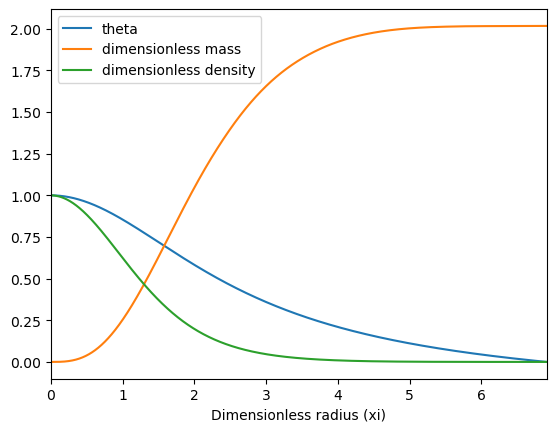

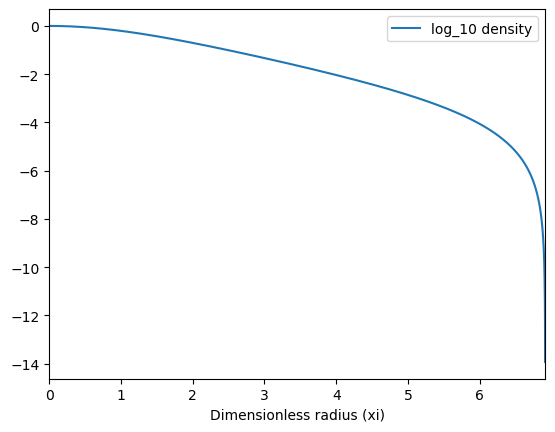

In [49]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp


# solve the Lane-Emden equation
# the rhs of the equation, 
# normalized to a system of first-order DEs 
def lane_emden_rhs(xi, y, n):
    if xi == 0:
         return 0

    theta, theta_prime = y
    theta_2prime = -2/xi*theta_prime - theta**n
    return theta_prime, theta_2prime

# the range to search
a,b=1e-8,10
t=np.arange(a,b,np.abs(a-b)/10000.0)


# initial values for theta, theta_prime
y0=[1, 0]

# polytropic index
n=3

# a zero-crossing event to terminate the integration at the stellar surface
def event_zero_crossing(xi, y, n):
    return y[0]  # θ = y[0]
event_zero_crossing.terminal = True
event_zero_crossing.direction = -1  # only detect downward zero crossing

# run the solver
sol = solve_ivp(lane_emden_rhs,(a,b), y0, args=(n,), t_eval=t, events=event_zero_crossing)

# get some statistics
# dimensionless stellar radius
xi_1 = sol.t[-1]
# dimensionless stellar mass
stellar_radius = -xi_1**2 * sol.y[1][-1]

# dimensionless average inverse density
rho_c_over_rho_avg = 1/3*(xi_1/-sol.y[1][-1])

density_profile = sol.y[0]**n
density_mass = -(sol.t**2)*sol.y[1]

#print the statistics
print(f"Dimensionless stellar radius: {xi_1:.4f}")
print(f"Dimensionless stellar mass: {stellar_radius:.4f}")
print(f"Central density to average density ratio: {rho_c_over_rho_avg:.4f}")

# plot the solution
plt.plot(sol.t, sol.y[0], label='theta')
plt.plot(sol.t, density_mass, label='dimensionless mass')
plt.plot(sol.t, density_profile, label='dimensionless density')


plt.xlim(0, sol.t[-1])
plt.xlabel('Dimensionless radius (xi)')
plt.legend()
plt.show()

plt.plot(sol.t, np.log10(density_profile), label='log_10 density')
plt.xlim(0, sol.t[-1])
plt.xlabel('Dimensionless radius (xi)')
plt.legend()
plt.show()

